## Import

In [32]:
#custom
from CustomEnv.ExploratoryDataAnalyzer import ExploratoryDataAnalyzer
from CustomEnv.Standardizer import Standardize

#pandas
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.0f' % x)

#plotting
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (27, 5)
import seaborn as sns

## Load

In [33]:
dfraw = pd.read_csv(r'..\raw_data\train.csv')
dfraw.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C85,C


## EDA Prior to Preprocess

In [34]:
explore = ExploratoryDataAnalyzer(df=dfraw, predictors=['Sex', 'Age', 'Fare'], target='Survived')

In [35]:
explore.show_blanks()

      Column  Blank Count  Blank Percent
10     Cabin          687             77
5        Age          177             20
11  Embarked            2              0


## Preprocess

In [36]:
class Preprocess:

    def __init__(self, df):
        self.df = df

        #columns
        self.colage = 'Age'
        self.colpassengerid = 'PassengerID'

    def drop_useless_columns(self):
        self.df = self.df.drop(columns=['PassengerId', 'Ticket', 'Cabin'])

    def mean_impute_age(self):
        self.df.Age = self.df.Age.fillna(value=self.df.Age.mean())

    def standardize_survival(self):

        conversion_dict = {
            'died': ['0'],
            'survived': ['1'],
        }
        standardize = Standardize(df=self.df, print_conversions=False)
        standardize.standardize_column_values(conversion_dict=conversion_dict, current_col='Survived', revised_col='Survived_')
        self.df = standardize.df

    def bin_age(self):
        self.df['age_binned'] = pd.cut(self.df.Age.astype(int), bins=5)
        self.df['age_binnedevenly'] = pd.qcut(self.df.Age.astype(float), q=5)

    def run_pipeline(self):
        
        self.drop_useless_columns()
        self.mean_impute_age()
        self.standardize_survival()
        self.bin_age()
        return self.df.head()

preprocess = Preprocess(df=dfraw)
preprocess.run_pipeline()
df_preprocessed = preprocess.df


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived_,age_binned,age_binnedevenly
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7,S,died,"(16.0, 32.0]","(20.0, 28.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71,C,survived,"(32.0, 48.0]","(29.699, 38.0]"
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,8,S,survived,"(16.0, 32.0]","(20.0, 28.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53,S,survived,"(32.0, 48.0]","(29.699, 38.0]"
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8,S,died,"(32.0, 48.0]","(29.699, 38.0]"


## Explore

In [37]:
explore = ExploratoryDataAnalyzer(df=df_preprocessed, predictors=['Sex', 'Age', 'Fare'], target='Survived')

In [38]:
df_preprocessed.age_binnedevenly.value_counts()

(28.0, 29.699]    199
(20.0, 28.0]      183
(0.419, 20.0]     179
(38.0, 80.0]      177
(29.699, 38.0]    153
Name: age_binnedevenly, dtype: int64

### Correlations

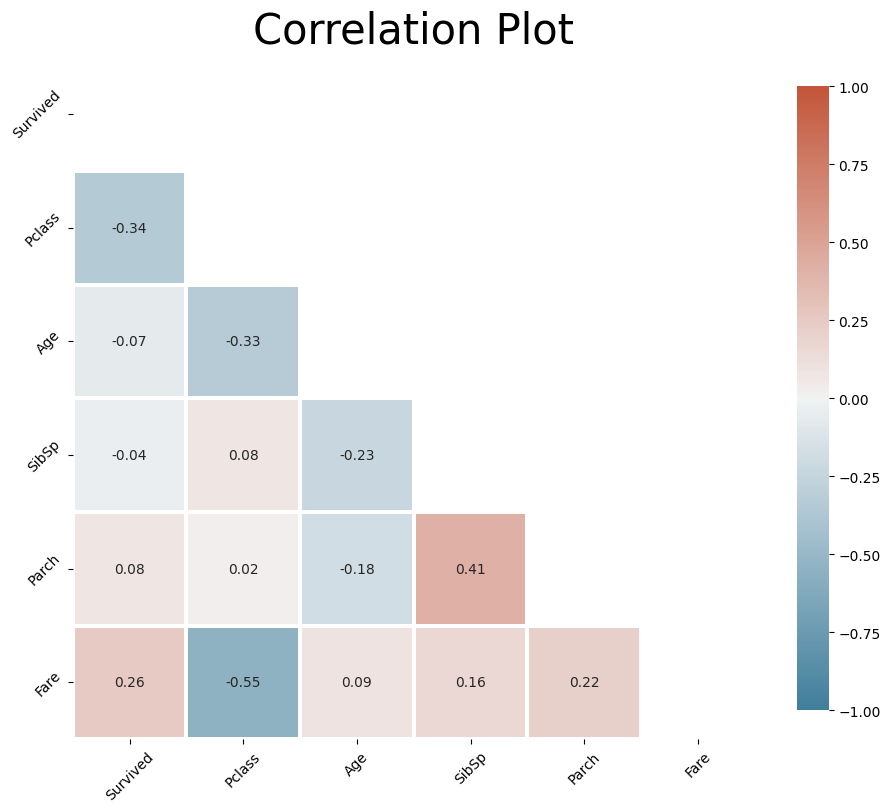

In [39]:
explore.plot_correlation_matrix(numeric_only=True)

### Blanks

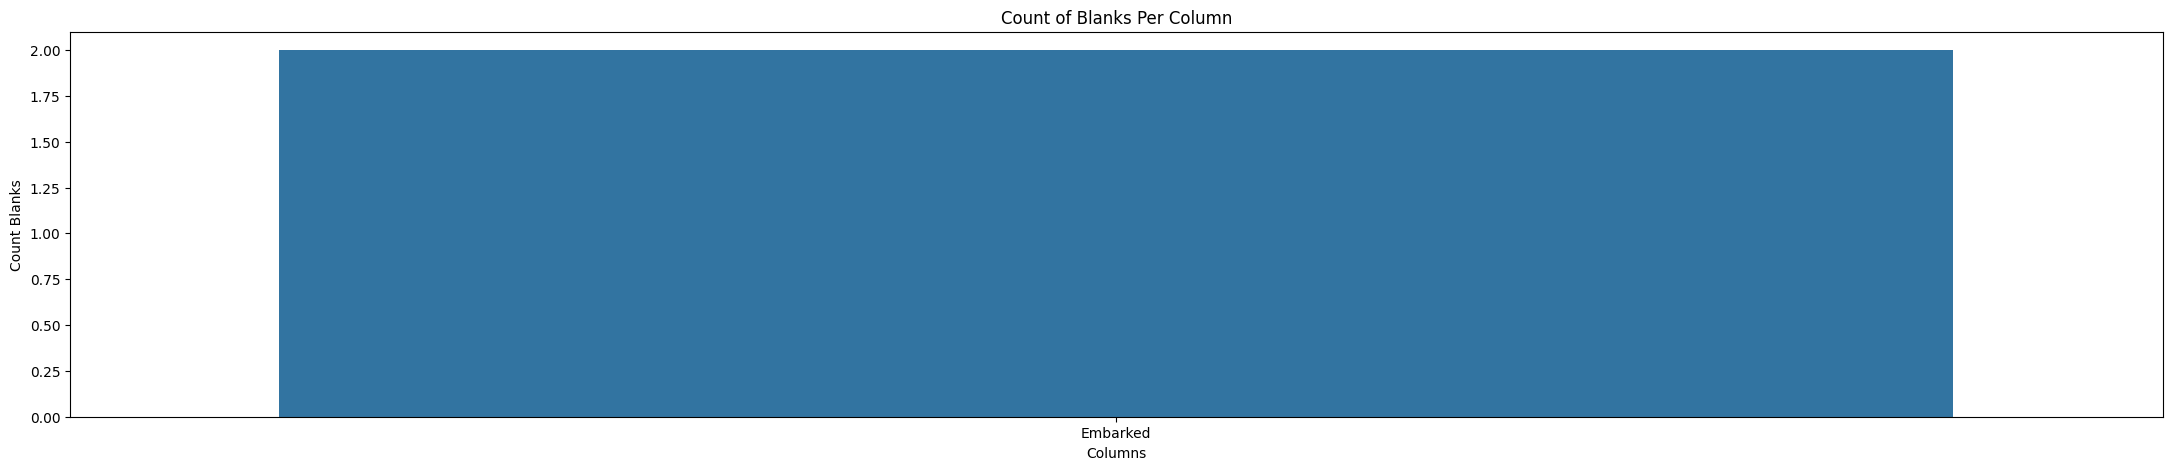

891

In [40]:
explore.plot_blanks_per_column()
len(df_preprocessed)

### Target Balance

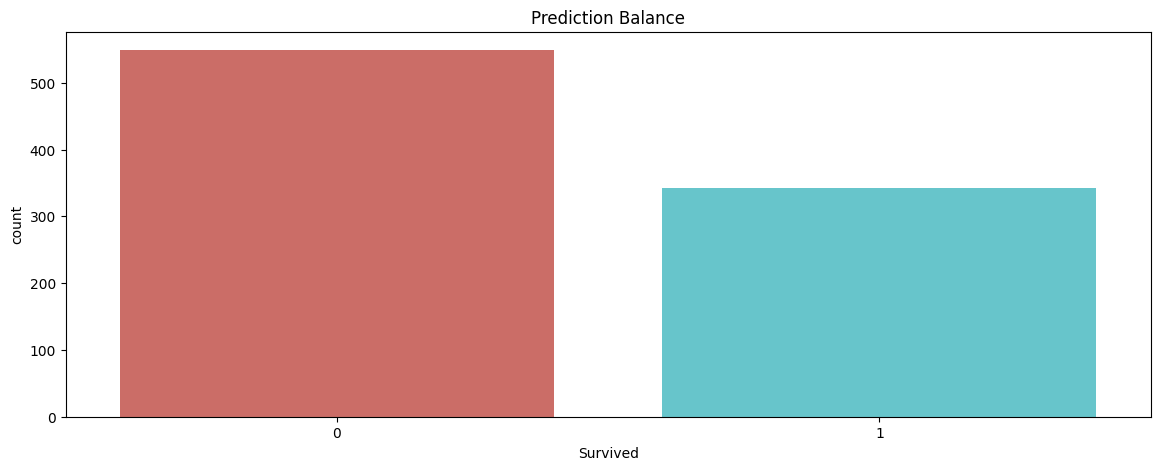

In [41]:
explore.plot_target_balance()

### Grouping Statistics

In [42]:
explore.show_target_grouping_statistics()
eda = dict()
eda['grouping stats'] = 'Age is slightly higher on '

mean stats: 
    Pclass  Age  SibSp  Parch  Fare
0       3   30      1      0    22
1       2   29      0      0    48 

median stats: 
    Pclass  Age  SibSp  Parch  Fare
0       3   30      0      0    10
1       2   30      0      0    26 



### Distributions

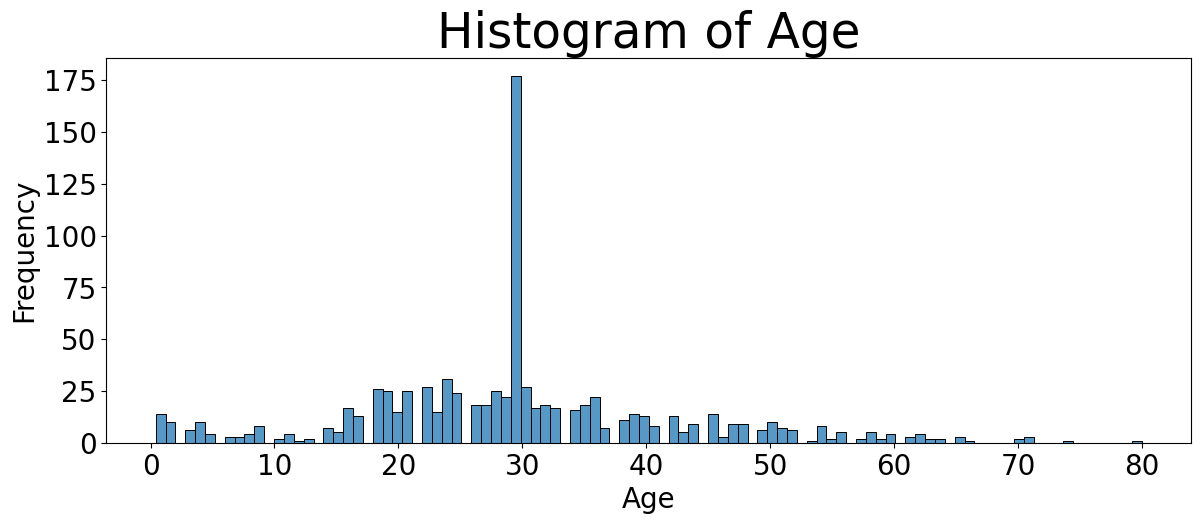

Age Statistics
skew: 0.43
kurtosis: 0.97
mean: 29.7 || median: 29.7 || mode: [29.7]
min: 0.42 || max: 80.0




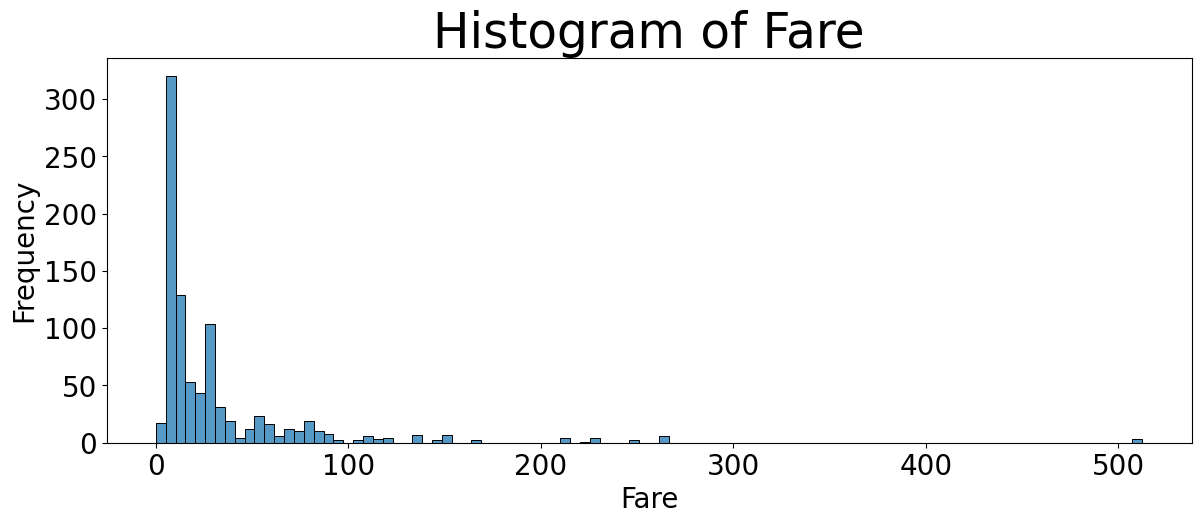

Fare Statistics
skew: 4.79
kurtosis: 33.4
mean: 32.2 || median: 14.5 || mode: [8.0]
min: 0.0 || max: 512.33




In [43]:
explore.plot_distribution(of_columns=['Age', 'Fare'])

explore.plot_n_lowest_and_highest_category_against_target(category='Age', n=5)

### Show Proportions

In [44]:
dfproportions = explore.show_proportions(col='Age', verbose=False)
dfproportions.head(10)

,Count,Percent,Cumulative %
30,177,20,20
24,30,3,23
22,27,3,26
18,26,3,29
28,25,3,32
30,25,3,35
19,25,3,38
21,24,3,40
25,23,3,43
36,22,2,45


In [45]:
dfproportions = explore.show_proportions(col='age_binned', verbose=False)
dfproportions.head(10)

,Count,Percent,Cumulative %
"(16.0, 32.0]",525,59,59
"(32.0, 48.0]",186,21,80
"(-0.08, 16.0]",100,11,91
"(48.0, 64.0]",69,8,99
"(64.0, 80.0]",11,1,100


In [46]:
#explore.multi_ecdf(series_to_compute=)

In [47]:
#explore.plot_categorical_outlier_impact_on_target_variable()

### Who Survived

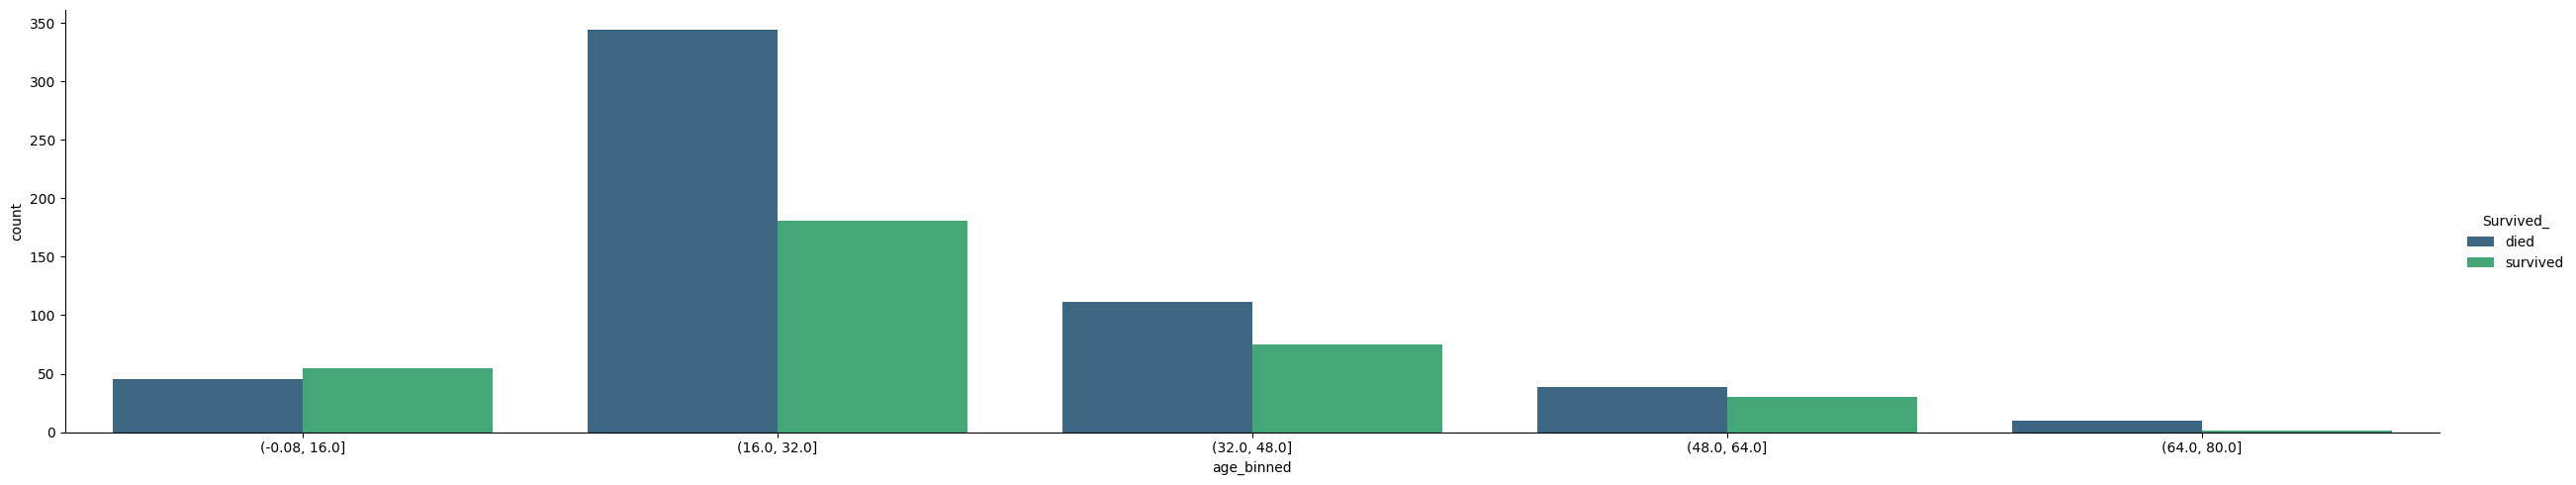

In [48]:
def group_by_age_and_surivival(df):
    #nipy_spectral, prism_r, seismic_r, viridis, winter
    sns.catplot(data=df, x='age_binned', hue='Survived_', palette='viridis', kind='count', height=5, aspect=5)
    plt.show()
    print()
group_by_age_and_surivival(df_preprocessed)

### Additional

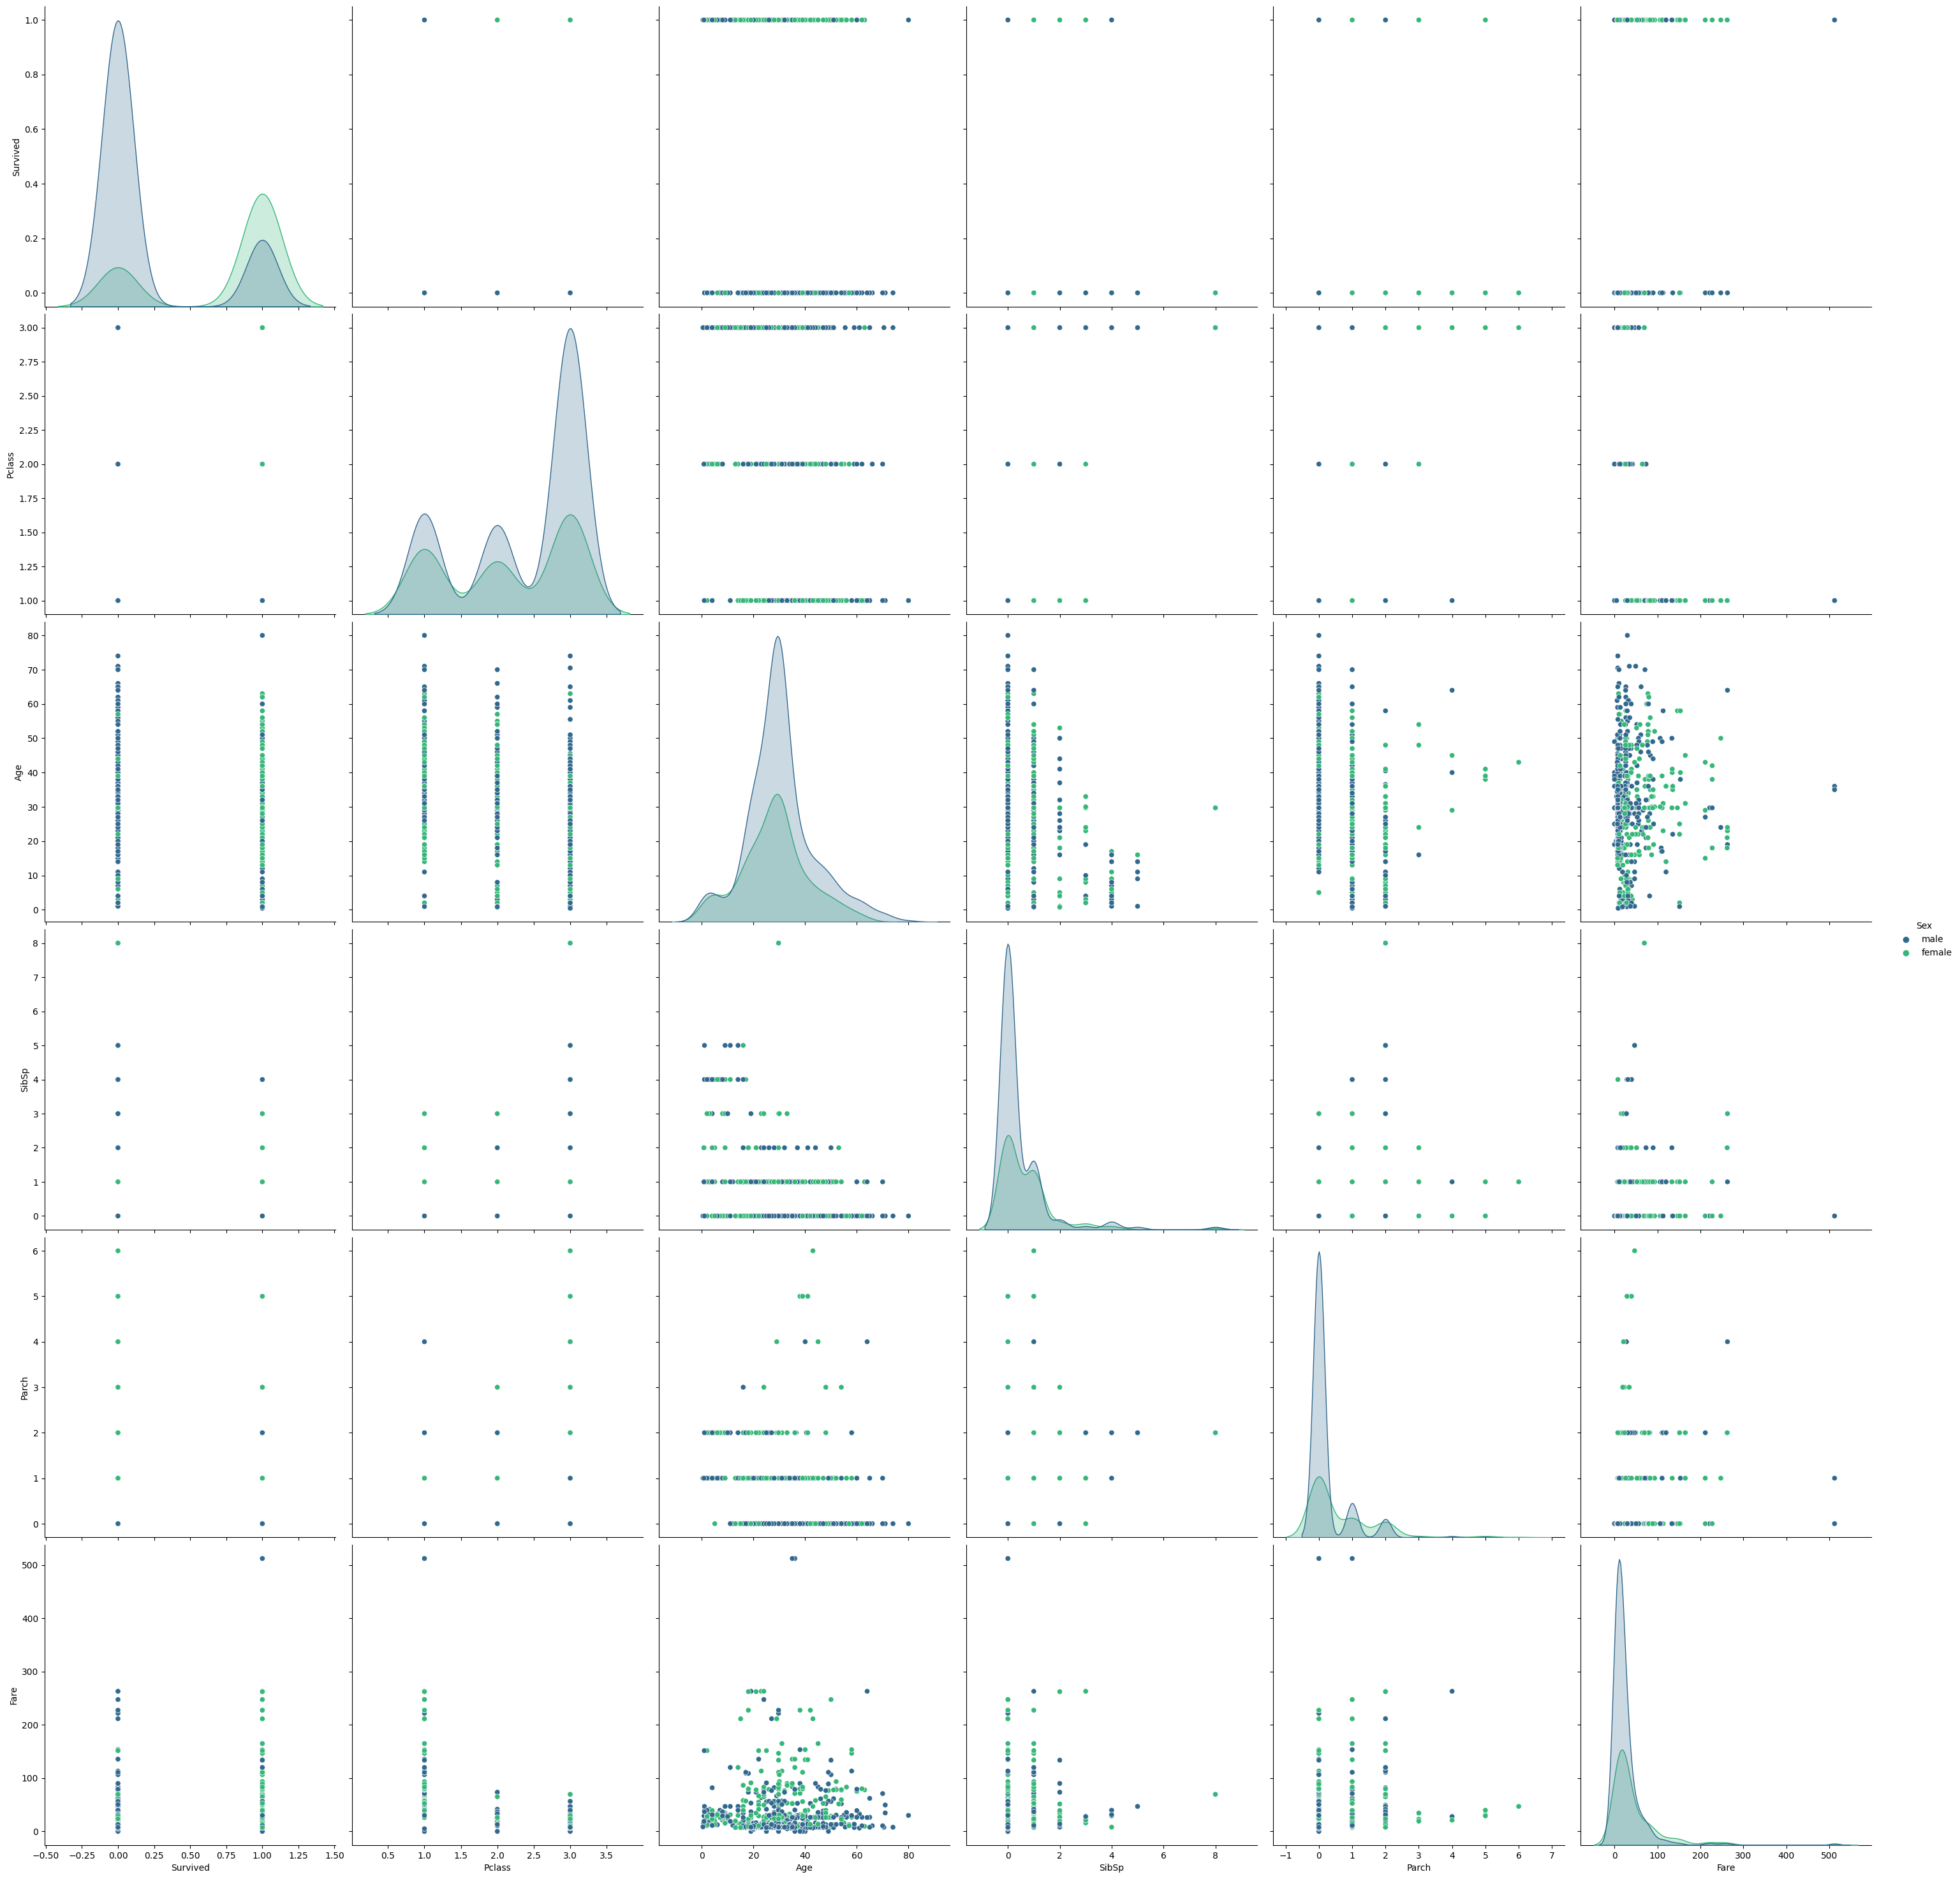

In [49]:
sns.pairplot(data=df_preprocessed, hue='Sex', palette='viridis', height=5, aspect=1)
plt.show()

## Preprocess Data